<a href="https://colab.research.google.com/github/potopaa/ml_course_HWs/blob/addition%2Fnew_HW/%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HP_ML_cource/csv/medical-charges.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### HW: Як можна підійти до вирішення задачі прогнозування колонки charges на основі інших колонок:
1. Візуалізуємо дані для виявлення можливих закономірностей:


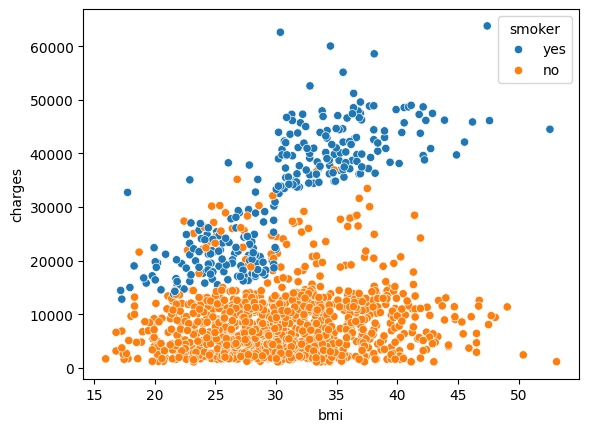

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()

У некурців більше шансів на меньші charges

2. Розрахувати коефіцієнт кореляції Пірсона

In [52]:
correlation_matrix = df.select_dtypes(include='number').corr()
correlation_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Беручи до уваги тільки числові колонки, вік найбільше позитивно корелює з charges

3. Розрахувати середні значення charges для кожної комбінації категорій:

In [53]:
mean_charges_by_group = df.groupby(['sex', 'smoker', 'region'])['charges'].mean().reset_index()
print(mean_charges_by_group.sort_values(by='charges', ascending=False))

       sex smoker     region       charges
14    male    yes  southeast  36029.839367
6   female    yes  southeast  33034.820716
15    male    yes  southwest  32598.862854
7   female    yes  southwest  31687.988430
12    male    yes  northeast  30926.252583
13    male    yes  northwest  30713.181419
5   female    yes  northwest  29670.824946
4   female    yes  northeast  28032.046398
0   female     no  northeast   9640.426984
1   female     no  northwest   8786.998679
8     male     no  northeast   8664.042222
2   female     no  southeast   8440.205552
9     male     no  northwest   8320.689321
3   female     no  southwest   8234.091260
11    male     no  southwest   7778.905534
10    male     no  southeast   7609.003587


Якцщо ви чоловік або жинка курець із southeast або southwest, у вас найвищі charges


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [54]:
import plotly.express as px

In [55]:
fig = px.histogram(df,
                  x="charges",
                  color="sex",
                  marginal="box",
                  nbins=47,
                  hover_data=df.columns,
                  facet_col="region",
                  category_orders={"sex": ["female", "male"], "region": ["southwest", "southeast", "northwest", "northeast"]}
)

fig.update_layout(
    title="Розподіл медичних зборів (charges) по категоріям sex и region:",
    bargap=0.1,
    xaxis_title="сharges",
    yaxis_title="Count",
    legend_title="Sex"
)

fig.show()

###HW СПОСТЕРЕЖЕННЯ:
Відмінності по статі:
У регіоні northwest жінки мають більш високі медіанні значення зборів, ніж чоловіки. На відміну від інших регіонів.

Відмінності по регіону:
Деякі регіони можуть мати більш високі медіані збори, що може бути пов'язано з різними факторами, такими як вартість медичних послуг в регіоні, або наявність в регіоні екологічно шкідливих виробництв, що впливає на загальний рівень здоров*я.

Варіативність даних:
Маржинальні бокс-плоти дозволяють побачити варіативність даних у кожній категорії. Це допомагає зрозуміти розкид значень та наявність викидів.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [56]:
fig_region = px.histogram(
    df,
    x='region',
    color='smoker',
    marginal="box",
    barmode='group',
    title='Розподіл по регіонам відносно куріння',
    labels={'region': 'Регіон', 'smoker': 'Куріння:'}
)


fig_children = px.histogram(
    df,
    y='children',
    color='smoker',
    marginal="box",
    barmode='group',
    title='Розподіл по кількості дітей відносно куріння',
    labels={'children': 'К-сть дітей', 'smoker': 'Куріння:'}
)

fig.update_layout(bargap=0.1)
fig_region.show()
fig_children.show()

### HW СПОСТЕРЕЖЕННЯ:

Розподіл по регіонах:

Розподіл між курцями/некурцями по регіонам майже однаковий.
Більшість курців і некурців в регіоні southeast, це може вказувати на більшу в порівнянні з іншими регіонами кількість заявників.

Розподіл за кількістю дітей:

Найбільше курців серед бездітних. Після 3 дитини бажання курити стрімко знижується.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [57]:
fig = px.violin(df, y='charges',
                x='children',
                title="Зв'язок між медичними витратами та кількістю дітей",
                labels={'charges': 'charges', 'children': 'Кількість дітей'})

fig.show()

### HW СПОСТЕРЕЖЕННЯ

Найменьші charges серед батьків 5 дітей. Найбільші серед бездітних та тих у кого 3 дитини.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [58]:
non_smoker_df = df[df.smoker == 'no']

In [59]:
def estimate_charges(age, w, b):
    return w * age + b

In [70]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

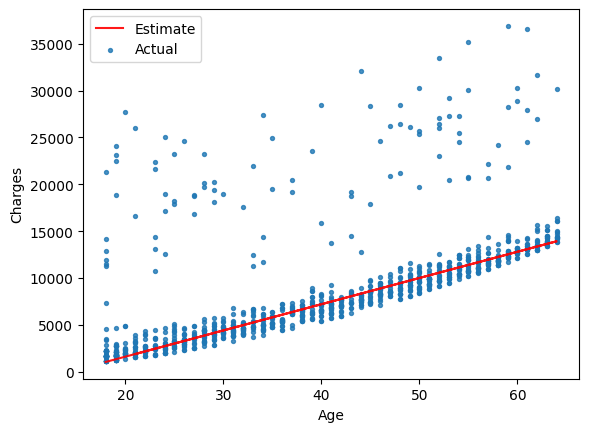

In [155]:
w1=280
b1=-4000
try_parameters(non_smoker_df, w1, b1)

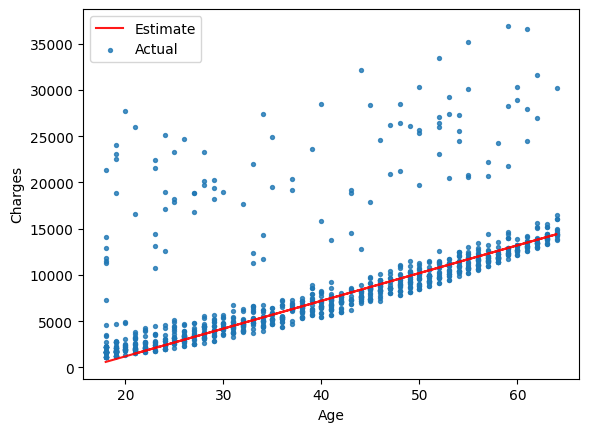

In [156]:
w2=300
b2=-4800
try_parameters(non_smoker_df, w2, b2)

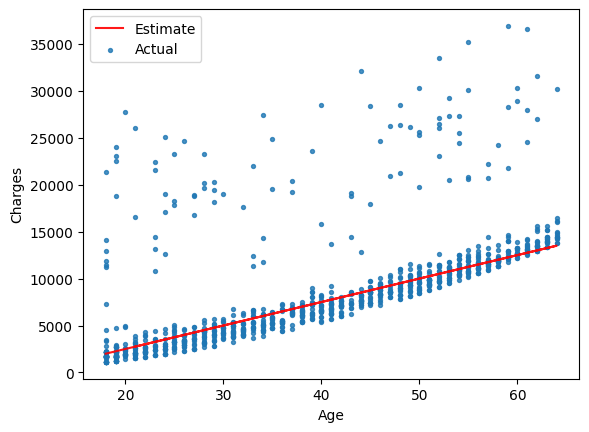

In [164]:
w3=250
b3=-2500
try_parameters(non_smoker_df, w3, b3)

### HW СПОСТЕРЕЖЕННЯ:

Візуально можна визначити, як змінюються медичні збори з віком для людей, які не палять. Більшість даних лежать приблизно на одній прямій лінії, це говорить про лінійну залежність.
Наявні точки, які сильно відхиляються від загальної тенденції, що може вказувати на аномальні або особливі випадки. Розсіювання викидів розміщено з помітним напрямком паралельно основним даним. Це може свідчиті на користь особливих випадків.

Кут нахилу прямої w та коефіцієнт зміщення b підбирав методом перебору, звіряючись з графіком.


**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [158]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [159]:
targets = non_smoker_df['charges']
predicted1 = estimate_charges(non_smoker_df.age, w1, b1)
predicted2 = estimate_charges(non_smoker_df.age, w2, b2)
predicted3 = estimate_charges(non_smoker_df.age, w3, b3)

In [160]:
rmse(targets, predicted1), rmse(targets, predicted2), rmse(targets, predicted3)

(4873.301227056433, 4895.316570935443, 4793.904061890193)

### HW
Найнижче значення втрат, яке вдалося досягти: 4793.904061890193

Можливі стратегії для знаходження кращих значень:
1. Можемо ітеративно пробувати різні значення w та b, порівнюючи RMSE для кожного набору, щоб знайти ті значення, які мінімізують RMSE.
2. Можемо почати з грубої сітки значень та поступово уточнювати діапазони параметрів, щоб знайти оптимальні значення.